In [53]:
import torch
from torch.nn import Linear
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [3]:
def forward(x):
    y = w*x + b
    return y

In [6]:
x = torch.tensor([[4], [7]])

In [7]:
forward(x)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

In [9]:
torch.manual_seed(42)

In [10]:
model = Linear(in_features=1, out_features=1)

In [11]:
model.bias, model.weight

(Parameter containing:
 tensor([0.8300], requires_grad=True), Parameter containing:
 tensor([[0.7645]], requires_grad=True))

In [12]:
x = torch.tensor([2.0])

In [13]:
model(x)

tensor([2.3591], grad_fn=<AddBackward0>)

In [15]:
x = torch.tensor([[4.], [7.]])
model(x)

tensor([[3.8882],
        [6.1818]], grad_fn=<AddmmBackward>)

In [80]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        self.linear = Linear(in_features=input_size, out_features=output_size)
    
    def forward(self, x):
        y_hat = self.linear(x)
        return y_hat
    

In [59]:
torch.manual_seed(1)
model = LR(1, 1)

In [60]:
list(model.parameters())

[Parameter containing:
 tensor([[0.5153]], requires_grad=True), Parameter containing:
 tensor([-0.4414], requires_grad=True)]

In [61]:
model.forward(x)

tensor([[1.6197],
        [3.1655]], grad_fn=<AddmmBackward>)

In [79]:
X = torch.randn(100, 1)*10
y = X + torch.randn(100, 1)*3 + 4

In [81]:
X.size()

torch.Size([100, 1])

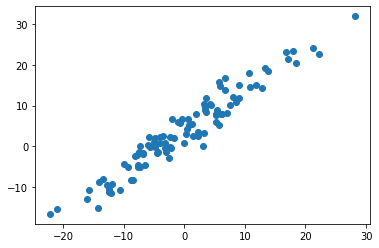

In [82]:
plt.plot(X.numpy(), y.numpy(), 'o')

In [83]:
torch.manual_seed(42)
model = LR(1, 1)

In [84]:
model

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [85]:
def get_params():
    [w, b] = model.parameters()
    return w[0][0].item(), b[0].item()

def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1*x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()
    

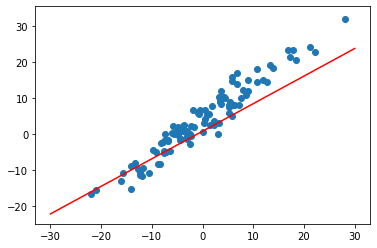

In [86]:
plot_fit("Initial model")

In [87]:
criterian = nn.MSELoss()

In [88]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [89]:
epochs = 100

In [90]:
losses = []
for i in range(epochs):
    y_hat = model.forward(X)
    loss = criterian(y_hat, y)
    print(f"epoch: {i}, loss: {loss.item()}")
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0, loss: 21.599365234375
epoch: 1, loss: 19.164339065551758
epoch: 2, loss: 17.5546817779541
epoch: 3, loss: 16.448509216308594
epoch: 4, loss: 15.65141487121582
epoch: 5, loss: 15.045916557312012
epoch: 6, loss: 14.56093692779541
epoch: 7, loss: 14.153402328491211
epoch: 8, loss: 13.797136306762695
epoch: 9, loss: 13.476174354553223
epoch: 10, loss: 13.180706024169922
epoch: 11, loss: 12.904650688171387
epoch: 12, loss: 12.644180297851562
epoch: 13, loss: 12.396830558776855
epoch: 14, loss: 12.160968780517578
epoch: 15, loss: 11.935468673706055
epoch: 16, loss: 11.719512939453125
epoch: 17, loss: 11.512481689453125
epoch: 18, loss: 11.313871383666992
epoch: 19, loss: 11.123261451721191
epoch: 20, loss: 10.94028091430664
epoch: 21, loss: 10.764595031738281
epoch: 22, loss: 10.595895767211914
epoch: 23, loss: 10.433894157409668
epoch: 24, loss: 10.278319358825684
epoch: 25, loss: 10.128911018371582
epoch: 26, loss: 9.985422134399414
epoch: 27, loss: 9.847618103027344
epoch: 28, l

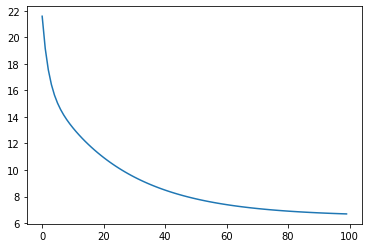

In [91]:
plt.plot(range(epochs), losses)


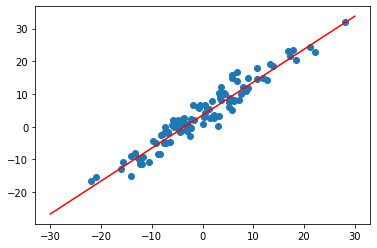

In [92]:
plot_fit("Training model")